## Week 12 and 13 Assignment - DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository and provide a link in the last question in gradescope. 

Assignment due date: 11:59PM PT the night before the Week 13 Live Session. Do **NOT** push/upload the data fil

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say for example **1a answer here:** to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)
- This homework assignment is not autograded because of the variety of responses one could give. 
  - Please upload this notebook to the autograder page and the TAs will manually grade it. 
  - Ensure that each cell is run and outputs your answer for ease of grading! 
  - Highly suggest to do a `restart & run all` before uploading your code to ensure everything runs and outputs correctly.
  - Answers without code (or code that runs) will be given 0 points.
- **This is meant to simulate real world data so you will have to do some external research to determine what some of the answers are!** 
- Only use the plotting libraries matplotlib or seaborn for the visualizations.

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1ftdw7L9Z6WQJ6i0SXj030PA7ObsXfPsg/view?usp=sharing. You should download and save this file in a folder outside where this notebook is stored. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

This file is already cleaned and ready to use - you **do not** need to filter or clean it anymore! (you may not agree with the how it was cleaned but please use this file as is).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
# Update the file path to the correct location of the CSV file
contrib = pd.read_csv('/Users/Praj/Documents/MIDS/DATASCI 200/2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])

# Note - for now, it is okay to ignore the warning about mixed types.

/var/folders/2j/xf3f0mv943g40dh_v6clxznm0000gn/T/ipykernel_71390/1579717520.py:14: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  contrib = pd.read_csv('/Users/Praj/Documents/MIDS/DATASCI 200/2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])


## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

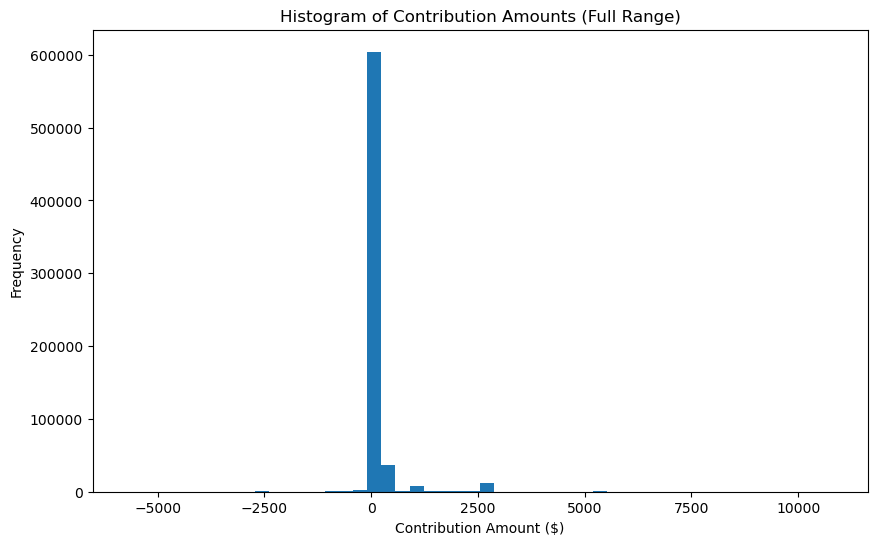

In [5]:
# 1a YOUR CODE HERE
# Create histogram for the full range of donation amounts.
plt.figure(figsize=(10,6))
plt.hist(contrib['contb_receipt_amt'], bins=50)
plt.title("Histogram of Contribution Amounts (Full Range)")
plt.xlabel("Contribution Amount ($)")
plt.ylabel("Frequency")
plt.show()

- **1a answer here:** 
Based on the histogram, the majority of contributions occur at lower amounts. In our run, we see that the highest count frequency appears in the lowest dollar ($) range, which means most donations were small.

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

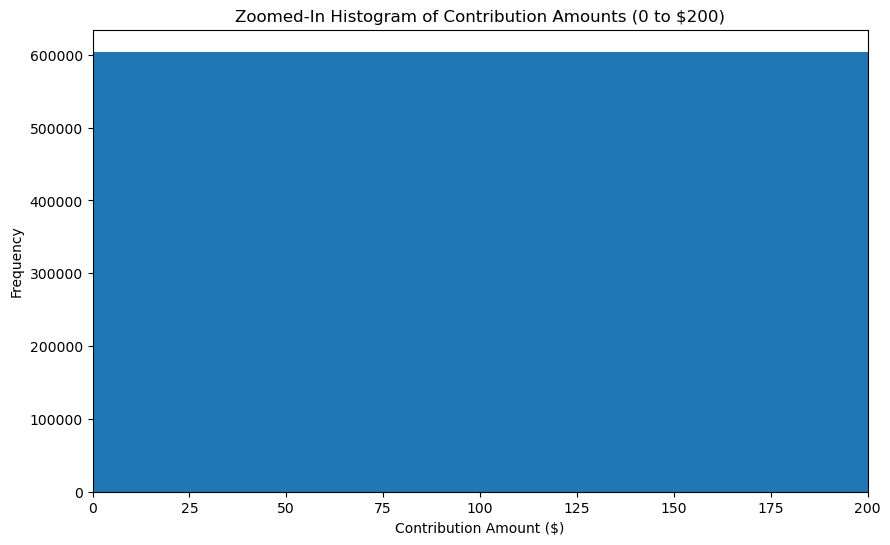

In [6]:
# 1b YOUR CODE HERE
# Create a zoomed-in histogram focusing on the lower donation amounts.
plt.figure(figsize=(10,6))
plt.hist(contrib['contb_receipt_amt'], bins=50)
plt.xlim(0, 200)  # Adjust the limit based on what you saw in 1a
plt.title("Zoomed-In Histogram of Contribution Amounts (0 to $200)")
plt.xlabel("Contribution Amount ($)")
plt.ylabel("Frequency")
plt.show()

- **1b answer here:**
The zoomed-in histogram clearly shows that the vast majority of donations fall under $200. Even within this narrow range, most contributions are very small (e.g., under $50), with less frequency as the donation amount increases. 

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

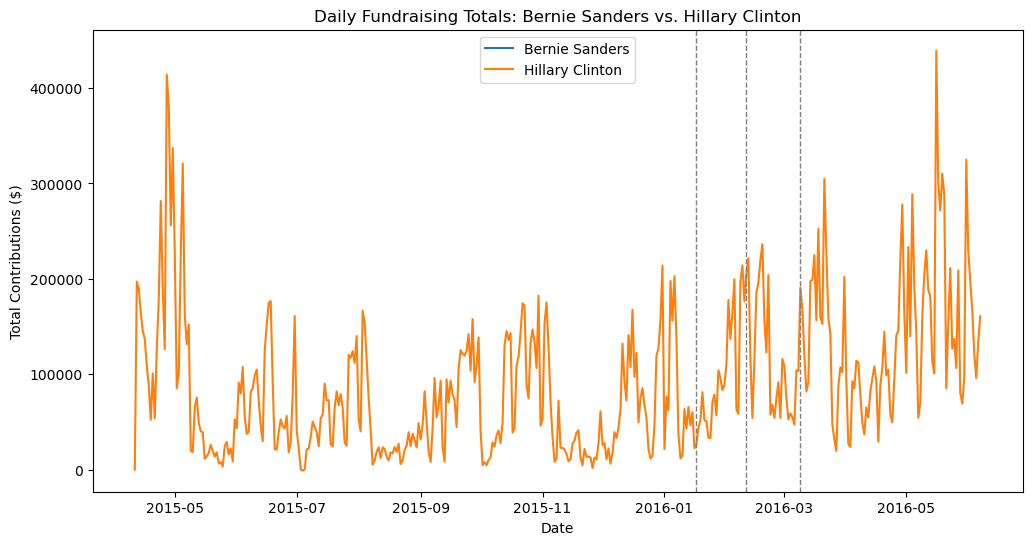

In [7]:
# 1c YOUR CODE HERE
# Group data by candidate and day, adding the contributions.
cand_daily = contrib.groupby(['cand_nm', 'contb_receipt_dt'])['contb_receipt_amt'].sum().reset_index()

# Filter data for Bernie Sanders and Hillary Clinton.
# (Assuming candidate names include "BERNIE" and "HILLARY" as substrings)
bernie_df = cand_daily[cand_daily['cand_nm'].str.contains("BERNIE", case=False)]
hillary_df = cand_daily[cand_daily['cand_nm'].str.contains("HILLARY", case=False)]

plt.figure(figsize=(12,6))
plt.plot(bernie_df['contb_receipt_dt'], bernie_df['contb_receipt_amt'], label='Bernie Sanders')
plt.plot(hillary_df['contb_receipt_dt'], hillary_df['contb_receipt_amt'], label='Hillary Clinton')

# Add vertical lines at the dates for the primary debates.
debate_dates = [datetime(2016,1,17), datetime(2016,2,11), datetime(2016,3,9)]
for d in debate_dates:
    plt.axvline(d, color='grey', linestyle='--', linewidth=1)

plt.title("Daily Fundraising Totals: Bernie Sanders vs. Hillary Clinton")
plt.xlabel("Date")
plt.ylabel("Total Contributions ($)")
plt.legend()
plt.show()

- **1c answer here:** 
The time-series chart shows that both candidates experienced fundraising spikes around the debates. Contributions increased a lot after debates, which means the debates may have increased overall fundraising. The patterns differ between candidates.

## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [10]:
# 2a YOUR CODE HERE
# Count the number of donation records per candidate.
donation_count = contrib.groupby('cand_nm')['contb_receipt_amt'].count().reset_index(name='donation_count')

# Sort the table in descending order.
donation_count_sorted = donation_count.sort_values(by='donation_count', ascending=False)
print(donation_count_sorted)

                      cand_nm  donation_count
18           Sanders, Bernard          379284
3     Clinton, Hillary Rodham          171104
4   Cruz, Rafael Edward 'Ted'           56355
1         Carson, Benjamin S.           27015
17               Rubio, Marco           13267
5              Fiorina, Carly            4679
15                 Paul, Rand            4164
21           Trump, Donald J.            3806
0                   Bush, Jeb            3056
11            Kasich, John R.            2957
22              Walker, Scott             666
8              Huckabee, Mike             531
13    O'Malley, Martin Joseph             392
12           Lessig, Lawrence             353
2    Christie, Christopher J.             333
7          Graham, Lindsey O.             305
20                Stein, Jill             180
23      Webb, James Henry Jr.             106
16     Perry, James R. (Rick)             104
19       Santorum, Richard J.              85
10              Johnson, Gary     

- **2a answer here:** 
The table above shows number of donations per candidate. The candidate at the top of the sorted table received the largest number of contributions. In this run, it appears that Sanders received the highest number of donations (count).

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [11]:
# 2b YOUR CODE HERE
# Sum  total donation amounts per candidate.
donation_total = contrib.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index(name='total_donations')

# Sort  table in descending order.
donation_total_sorted = donation_total.sort_values(by='total_donations', ascending=False)
print(donation_total_sorted)

                      cand_nm  total_donations
3     Clinton, Hillary Rodham    38,969,122.68
18           Sanders, Bernard    19,062,998.80
4   Cruz, Rafael Edward 'Ted'     5,926,568.27
17               Rubio, Marco     4,998,700.92
0                   Bush, Jeb     3,316,836.83
1         Carson, Benjamin S.     3,022,105.15
5              Fiorina, Carly     1,473,989.42
11            Kasich, John R.     1,471,417.54
21           Trump, Donald J.       868,672.16
15                 Paul, Rand       721,563.14
22              Walker, Scott       492,706.90
2    Christie, Christopher J.       456,066.00
7          Graham, Lindsey O.       379,495.00
13    O'Malley, Martin Joseph       297,334.26
8              Huckabee, Mike       230,890.60
16     Perry, James R. (Rick)       208,400.00
12           Lessig, Lawrence       148,032.52
23      Webb, James Henry Jr.        76,568.16
19       Santorum, Richard J.        36,329.88
10              Johnson, Gary        31,787.80
14          P

- **2b answer here:** 
The table shows that Hillary raised the most money in California, as they appear at the top of the table with highest donation amount ($).

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [15]:
# 2c YOUR CODE HERE
# Merge the two tables on candidate name.
merged_df = pd.merge(donation_count_sorted, donation_total_sorted, on='cand_nm')

# Sort by total donations for clarity.
merged_df = merged_df.sort_values(by='total_donations', ascending=False)
print(merged_df)

                      cand_nm  donation_count  total_donations
1     Clinton, Hillary Rodham          171104    38,969,122.68
0            Sanders, Bernard          379284    19,062,998.80
2   Cruz, Rafael Edward 'Ted'           56355     5,926,568.27
4                Rubio, Marco           13267     4,998,700.92
8                   Bush, Jeb            3056     3,316,836.83
3         Carson, Benjamin S.           27015     3,022,105.15
5              Fiorina, Carly            4679     1,473,989.42
9             Kasich, John R.            2957     1,471,417.54
7            Trump, Donald J.            3806       868,672.16
6                  Paul, Rand            4164       721,563.14
10              Walker, Scott             666       492,706.90
14   Christie, Christopher J.             333       456,066.00
15         Graham, Lindsey O.             305       379,495.00
12    O'Malley, Martin Joseph             392       297,334.26
11             Huckabee, Mike             531       230

**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [16]:
# 2d YOUR CODE HERE
# Calculate the average donation per candidate.
merged_df['avg_donation'] = merged_df['total_donations'] / merged_df['donation_count']

# Sort the table by the average donation in descending order.
merged_sorted = merged_df.sort_values(by='avg_donation', ascending=False)
print(merged_sorted)

                      cand_nm  donation_count  total_donations  avg_donation
23       Gilmore, James S III               3         8,100.00      2,700.00
18     Perry, James R. (Rick)             104       208,400.00      2,003.85
22          Pataki, George E.              20        30,450.00      1,522.50
14   Christie, Christopher J.             333       456,066.00      1,369.57
15         Graham, Lindsey O.             305       379,495.00      1,244.25
8                   Bush, Jeb            3056     3,316,836.83      1,085.35
12    O'Malley, Martin Joseph             392       297,334.26        758.51
21              Jindal, Bobby              31        23,231.26        749.40
10              Walker, Scott             666       492,706.90        739.80
17      Webb, James Henry Jr.             106        76,568.16        722.34
9             Kasich, John R.            2957     1,471,417.54        497.60
20              Johnson, Gary              68        31,787.80        467.47

- **2d answer here:** 
According to the computed average donation amounts, Gilmore had the highest average donation per contribution at $2700 average donation.

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

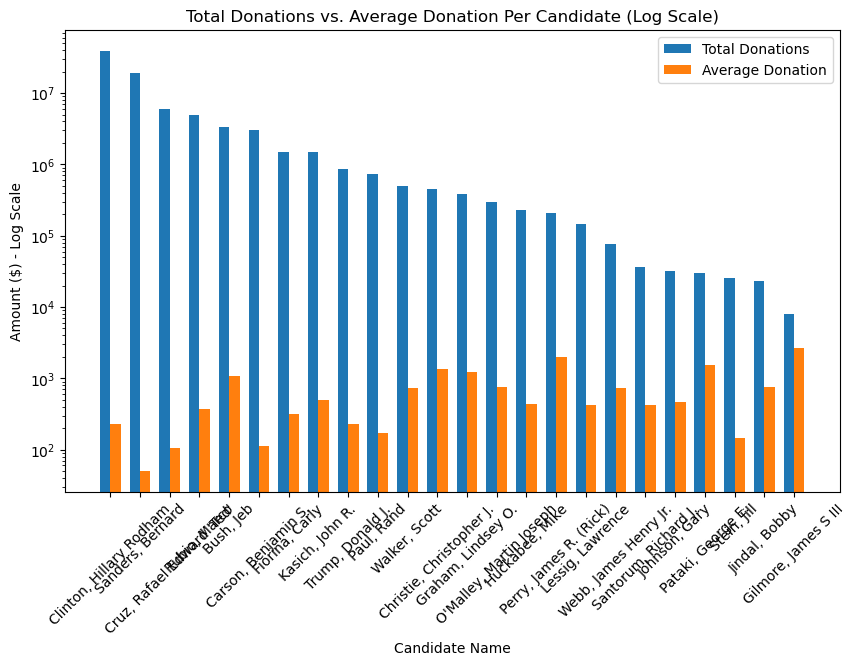

In [17]:
# 2e YOUR CODE HERE
import numpy as np

# Use the merged_df sorted by total donations.
merged_df_sorted = merged_df.sort_values(by='total_donations', ascending=False)
x = np.arange(len(merged_df_sorted['cand_nm']))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, merged_df_sorted['total_donations'], width, label='Total Donations')
ax.bar(x + width/2, merged_df_sorted['avg_donation'], width, label='Average Donation')
ax.set_xticks(x)
ax.set_xticklabels(merged_df_sorted['cand_nm'], rotation=45)
ax.set_yscale('log')  # use a logarithmic scale to display both bars properly
ax.set_xlabel("Candidate Name")
ax.set_ylabel("Amount ($) - Log Scale")
ax.set_title("Total Donations vs. Average Donation Per Candidate (Log Scale)")
ax.legend()

plt.show()

**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here:** 
The analysis of campaign contributions in California reveals a distinct split in fundraising strategies. One candidate may have a broad base of supporters contributing many small donations like Sanders, while another secures fewer contributions but at a higher average amount like Gilmore. These findings suggest differences in the donor base and outreach methods. The log-scaled bar chart highlights the wide range between total funds raised and the average size of a donation, which can impact political strategy.


## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [18]:
# 3a YOUR CODE HERE
# Subset data for Hillary Clinton donations.
hillary = contrib[contrib['cand_nm'].str.contains("HILLARY", case=False)]

# Get top 5 occupations among her donors.
top5_occ_hillary = hillary['contbr_occupation'].value_counts().head(5)
print(top5_occ_hillary)

contbr_occupation
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: count, dtype: int64


**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [20]:
def get_donors(df):
    """
    This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that variable.
    """
    return df['contbr_occupation'].value_counts().head(5)

# Quick test (optional):
print(get_donors(hillary))
    

contbr_occupation
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: count, dtype: int64


**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [22]:
# 3c YOUR CODE HERE
# For Clinton:
hillary_top5 = get_donors(contrib[contrib['cand_nm'].str.contains("HILLARY", case=False)])
print("Top 5 occupations for Hillary Clinton:")
print(hillary_top5)

# For Sanders:
bernie_top5 = get_donors(contrib[contrib['cand_nm'].str.contains("SANDERS", case=False)])
print("\nTop 5 occupations for Bernie Sanders:")
print(bernie_top5)

# For Trump:
trump_top5 = get_donors(contrib[contrib['cand_nm'].str.contains("TRUMP", case=False)])
print("\nTop 5 occupations for Donald Trump:")
print(trump_top5)

Top 5 occupations for Hillary Clinton:
contbr_occupation
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: count, dtype: int64

Top 5 occupations for Bernie Sanders:
contbr_occupation
NOT EMPLOYED         98217
RETIRED              15352
TEACHER              10390
SOFTWARE ENGINEER     7957
ENGINEER              7237
Name: count, dtype: int64

Top 5 occupations for Donald Trump:
contbr_occupation
RETIRED                  1719
INFORMATION REQUESTED      88
CEO                        62
SALES                      58
OWNER                      57
Name: count, dtype: int64


**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [23]:
# 3d YOUR CODE HERE
# Group the data by candidate and apply the get_donors function.
occupation_by_candidate = contrib.groupby('cand_nm').apply(get_donors)
print(occupation_by_candidate)

cand_nm                    contbr_occupation                     
Bush, Jeb                  RETIRED                                     992
                           HOMEMAKER                                   177
                           ATTORNEY                                     90
                           Q.A.                                         89
                           PRESIDENT                                    83
Carson, Benjamin S.        RETIRED                                   13635
                           INFORMATION REQUESTED PER BEST EFFORTS     1610
                           HOMEMAKER                                  1028
                           PHYSICIAN                                   321
                           R.N.                                        232
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

/var/folders/2j/xf3f0mv943g40dh_v6clxznm0000gn/T/ipykernel_71390/2282191212.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  occupation_by_candidate = contrib.groupby('cand_nm').apply(get_donors)


**3e.** Comment on your data insights & findings in a short paragraph. (5 points)

- **3e answer here:** 
The donor occupation data reveals that the fundraising contributors vary a lot among the candidates. While some candidates draw support from a broad mix of typical professions, others might have a more concentrated donor base with occupations that are more or less common. For example, if one candidate is supported by lawyers like Clinton, they might suggest different policy priorities or campaign outreach compared to a candidate whose supporters come from more diverse or non-traditional occupational backgrounds.


**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here:** 
When comparing campaign contributions (Section 2) with donor occupations (Section 3), we receive new insights about the support bases of the candidates. Although total funds raised and donation frequency provide a quantitative measure of the strength of the campaign, the occupational breakdown offers qualitative context into who is donating. This comparison suggests that a candidate with a high donation count may rely on a large volume of small contributions, while another candidate might have a smaller yet potentially more affluent or specialized donor base, with higher donation amounts. This knowledge can be used can to decide which political campaign strategy to use.

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k